#### 주식 feature 후보들 산출
- 경기 동행 지수 v
- VKOSPI 지수(최근 변동성 함수) v
- 주택매매가격차이 v

- 과거 코스피 시계열 함수(종목 별?)v
- 거래량v







모델 공식 세워보기:

$y_t = \sigma_t\epsilon_t$

$\sigma_t^2=h_t\times f(x_{t-1})$



In [76]:
import pandas as pd

In [72]:
from pandas_datareader import data, wb  
from datetime import datetime


# 구글에서 코스피 지수를 받는 예시를 살펴보자.
# 기본적으로 기간이 설정되지 않으면, 2010년 01월 01일을 기준으로 오늘까지의 데이터를 받아온다.
df = data.DataReader("KRX:KOSPI", "google")



RemoteDataError: Unable to read URL: http://www.google.com/finance/historical?q=KRX%3AKOSPI&startdate=Jan+01%2C+2010&enddate=May+11%2C+2017&output=csv

In [80]:
vkospi

,일자,콜평균내재변동성,풋평균내재변동성,대표변동성,역사적변동성(90일)
2004-12-30,2004/12/30,18.1,23.0,20.0,19.8
2004-12-29,2004/12/29,18.2,24.7,21.0,19.7
2004-12-28,2004/12/28,19.3,25.3,22.0,19.7
2004-12-27,2004/12/27,19.7,24.8,22.2,19.8
2004-12-24,2004/12/24,19.3,23.7,21.3,19.8
2004-12-23,2004/12/23,18.8,26.0,22.4,19.9
2004-12-22,2004/12/22,20.1,25.3,22.5,19.8
2004-12-21,2004/12/21,20.1,26.1,22.9,19.9
2004-12-20,2004/12/20,19.5,26.1,22.3,20.1
2004-12-17,2004/12/17,19.8,25.1,22.0,20.1


In [4]:
economic = pd.read_excel('total_economic_table.xlsx')

In [89]:
economic

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
200401,76.9,0.5,1.3,2.8,0.7,3.7,-0.1,0.04,100.8,0.2,...,0.5,100.9,0.3,77,0.5,0.1,0.5,1.2,0.6,0.2
200402,77.2,0.4,1.4,0.8,-0.1,3.7,-0.3,0.02,100.9,0.1,...,0.6,101.3,0.4,77.3,0.4,1.3,0,-0.8,0.5,0
200403,77.4,0.3,0.5,-0.6,0,-2.1,-0.7,-0.08,100.8,-0.1,...,0.4,101.5,0.2,77.6,0.4,1.5,-0.2,1.5,0.4,-0.1
200404,77.6,0.3,1.4,0.6,0.3,-7.3,-0.7,-0.08,100.8,0,...,0.1,101.4,-0.1,77.8,0.3,1,-0.5,1.4,0.4,-0.1
200405,77.8,0.3,2,-0.6,0.5,-2.9,-0.7,-0.13,100.7,-0.1,...,-0.2,101,-0.4,78,0.3,0.7,-0.5,-0.4,0.4,-0.2
200406,77.9,0.1,0.7,-0.8,0.5,-0.4,-0.2,-0.1,100.6,-0.1,...,0,100.7,-0.3,77.9,-0.1,0.1,0.1,-7.9,0.4,-0.2
200407,78,0.1,0.3,-4.1,-1.2,10.2,-0.2,-0.14,100.4,-0.2,...,0,100.2,-0.5,77.9,0,0.6,0.4,-6.7,0.2,-0.2
200408,78,0,-1.2,-2.9,-1.4,-0.2,-0.2,-0.19,100.1,-0.3,...,0,99.7,-0.5,78,0.1,0.3,-0.3,-5,0.6,-0.2
200409,78,0,-2.4,-1.3,-1.2,-4.9,0.3,-0.2,99.8,-0.3,...,0.3,99.6,-0.1,78.1,0.1,0.3,0.2,-0.3,0.6,-0.3
200410,78.1,0.1,-2.1,-0.6,0.3,4.1,-0.1,-0.19,99.7,-0.1,...,0.3,99.6,0,78.3,0.3,0,-0.3,1.1,0.8,-0.3


In [37]:
start = '2004-01-02'
end = '2017-12-29'
# 'M' is month-end, instead I need same-day-of-month
pd.date_range(start, end, freq='D')

DatetimeIndex(['2004-01-02', '2004-01-03', '2004-01-04', '2004-01-05',
               '2004-01-06', '2004-01-07', '2004-01-08', '2004-01-09',
               '2004-01-10', '2004-01-11',
               ...
               '2017-12-20', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', length=5111, freq='D')

In [23]:
start = '2004-01'
end = '2017-01'
# 'M' is month-end, instead I need same-day-of-month
x = pd.date_range(start, end, freq='M')

In [52]:
date_frame = x.month+x.year*100

In [57]:
date_frame

AttributeError: 'numpy.ndarray' object has no attribute 'to_datetime'

In [17]:
df['YearMonth'] = df['ArrivalDate'].map(lambda x: 100*x.year + x.month)

NameError: name 'df' is not defined

In [28]:
economic =economic.transpose()

In [31]:
economic = economic[1:]

In [38]:
economic = economic.set_index(date_frame)

In [60]:
economic.index.to_datetime()

/Users/mac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  if __name__ == '__main__':


DatetimeIndex(['1970-01-01 00:00:00.000200401',
               '1970-01-01 00:00:00.000200402',
               '1970-01-01 00:00:00.000200403',
               '1970-01-01 00:00:00.000200404',
               '1970-01-01 00:00:00.000200405',
               '1970-01-01 00:00:00.000200406',
               '1970-01-01 00:00:00.000200407',
               '1970-01-01 00:00:00.000200408',
               '1970-01-01 00:00:00.000200409',
               '1970-01-01 00:00:00.000200410',
               ...
               '1970-01-01 00:00:00.000201603',
               '1970-01-01 00:00:00.000201604',
               '1970-01-01 00:00:00.000201605',
               '1970-01-01 00:00:00.000201606',
               '1970-01-01 00:00:00.000201607',
               '1970-01-01 00:00:00.000201608',
               '1970-01-01 00:00:00.000201609',
               '1970-01-01 00:00:00.000201610',
               '1970-01-01 00:00:00.000201611',
               '1970-01-01 00:00:00.000201612'],
              dtype=

In [59]:
economic.transpose()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
200401,76.9,0.5,1.3,2.8,0.7,3.7,-0.1,0.04,100.8,0.2,...,0.5,100.9,0.3,77,0.5,0.1,0.5,1.2,0.6,0.2
200402,77.2,0.4,1.4,0.8,-0.1,3.7,-0.3,0.02,100.9,0.1,...,0.6,101.3,0.4,77.3,0.4,1.3,0,-0.8,0.5,0
200403,77.4,0.3,0.5,-0.6,0,-2.1,-0.7,-0.08,100.8,-0.1,...,0.4,101.5,0.2,77.6,0.4,1.5,-0.2,1.5,0.4,-0.1
200404,77.6,0.3,1.4,0.6,0.3,-7.3,-0.7,-0.08,100.8,0,...,0.1,101.4,-0.1,77.8,0.3,1,-0.5,1.4,0.4,-0.1
200405,77.8,0.3,2,-0.6,0.5,-2.9,-0.7,-0.13,100.7,-0.1,...,-0.2,101,-0.4,78,0.3,0.7,-0.5,-0.4,0.4,-0.2
200406,77.9,0.1,0.7,-0.8,0.5,-0.4,-0.2,-0.1,100.6,-0.1,...,0,100.7,-0.3,77.9,-0.1,0.1,0.1,-7.9,0.4,-0.2
200407,78,0.1,0.3,-4.1,-1.2,10.2,-0.2,-0.14,100.4,-0.2,...,0,100.2,-0.5,77.9,0,0.6,0.4,-6.7,0.2,-0.2
200408,78,0,-1.2,-2.9,-1.4,-0.2,-0.2,-0.19,100.1,-0.3,...,0,99.7,-0.5,78,0.1,0.3,-0.3,-5,0.6,-0.2
200409,78,0,-2.4,-1.3,-1.2,-4.9,0.3,-0.2,99.8,-0.3,...,0.3,99.6,-0.1,78.1,0.1,0.3,0.2,-0.3,0.6,-0.3
200410,78.1,0.1,-2.1,-0.6,0.3,4.1,-0.1,-0.19,99.7,-0.1,...,0.3,99.6,0,78.3,0.3,0,-0.3,1.1,0.8,-0.3


In [ ]:
economic = 

In [338]:
import numpy as np

table = np.genfromtxt("table.txt",dtype=str)
table = table.transpose()

In [342]:
code_table = [None]*table.shape[0]
inx = 0

for i in range(table.shape[0]):
    Code = "KRX:"+table[i]
    code_table[inx] = Code
    inx =inx+1

In [343]:
code_table

['KRX:000020',
 'KRX:000050',
 'KRX:000070',
 'KRX:000100',
 'KRX:000120',
 'KRX:000140',
 'KRX:000150',
 'KRX:000210',
 'KRX:000230',
 'KRX:000240',
 'KRX:000270',
 'KRX:000480',
 'KRX:000640',
 'KRX:000660',
 'KRX:000670',
 'KRX:000700',
 'KRX:000720',
 'KRX:000810',
 'KRX:000830',
 'KRX:000880',
 'KRX:000990',
 'KRX:001040',
 'KRX:001060',
 'KRX:001120',
 'KRX:001130',
 'KRX:001210',
 'KRX:001230',
 'KRX:001300',
 'KRX:001430',
 'KRX:001440',
 'KRX:001520',
 'KRX:001630',
 'KRX:001680',
 'KRX:001740',
 'KRX:001790',
 'KRX:001800',
 'KRX:001940',
 'KRX:002020',
 'KRX:002030',
 'KRX:002240',
 'KRX:002270',
 'KRX:002300',
 'KRX:002350',
 'KRX:002380',
 'KRX:002390',
 'KRX:002790',
 'KRX:003000',
 'KRX:003030',
 'KRX:003120',
 'KRX:003190',
 'KRX:003240',
 'KRX:003300',
 'KRX:003410',
 'KRX:003450',
 'KRX:003480',
 'KRX:003490',
 'KRX:003520',
 'KRX:003550',
 'KRX:003570',
 'KRX:003600',
 'KRX:003640',
 'KRX:003920',
 'KRX:003940',
 'KRX:004000',
 'KRX:004020',
 'KRX:004130',
 'KRX:0041

In [30]:
finance_data = [None]*table.shape[0]
inx = 0

for i in table :
    try :
        Code = "KRX:"+i

        df = data.DataReader(  
        Code,        # name
        "google",           # data source
        datetime(2004, 1, 1),   # start
        datetime(2016, 12, 31),   # end
        )
        finance_data[inx] = df
        inx = inx+1
    except:
        print(i+" cant not extract from google")

251540cant not extract from google
256630cant not extract from google
264290cant not extract from google
267810cant not extract from google
166090cant not extract from google
251370cant not extract from google
258790cant not extract from google
225860cant not extract from google
266870cant not extract from google
265520cant not extract from google
263770cant not extract from google
063760cant not extract from google
264450cant not extract from google
178320cant not extract from google
183300cant not extract from google
246720cant not extract from google
262830cant not extract from google
217480cant not extract from google
002800cant not extract from google
083500cant not extract from google
087260cant not extract from google
257730cant not extract from google
241820cant not extract from google
140070cant not extract from google
206650cant not extract from google
148140cant not extract from google
205290cant not extract from google
260970cant not extract from google
256840cant not extra

In [32]:
finance_data

[Empty DataFrame
 Columns: [Open, High, Low, Close, Volume]
 Index: [], Empty DataFrame
 Columns: [Open, High, Low, Close, Volume]
 Index: [], Empty DataFrame
 Columns: [Open, High, Low, Close, Volume]
 Index: [], Empty DataFrame
 Columns: [Open, High, Low, Close, Volume]
 Index: [], Empty DataFrame
 Columns: [Open, High, Low, Close, Volume]
 Index: [], Empty DataFrame
 Columns: [Open, High, Low, Close, Volume]
 Index: [], Empty DataFrame
 Columns: [Open, High, Low, Close, Volume]
 Index: [],                Open     High     Low   Close   Volume
 Date                                                 
 2016-12-02  10800.0  10800.0  9050.0  9100.0  3281571
 2016-12-05   9150.0   9520.0  9050.0  9260.0   711671
 2016-12-06   9260.0   9400.0  9140.0  9150.0   359546
 2016-12-07   9180.0   9400.0  8190.0  8260.0   923953
 2016-12-08   8340.0   8550.0  7890.0  8260.0   480518
 2016-12-09   8170.0   8550.0  8140.0  8470.0   362480
 2016-12-12   8480.0   8940.0  8480.0  8800.0   257061
 2016-12

In [344]:

# 만약, 2016년의 데이터만 받아오고 싶다면,
# 다음과 같이 기간을 설정해줄 수 있다.
df = data.DataReader(  
        code_table,        # name
        "google",           # data source
        datetime(2004, 1, 1),   # start
        datetime(2017, 1, 1),   # end
    )


/Users/mac/anaconda/lib/python3.6/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'KRX:003640', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/mac/anaconda/lib/python3.6/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'KRX:005270', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/mac/anaconda/lib/python3.6/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'KRX:005280', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/mac/anaconda/lib/python3.6/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'KRX:009720', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/mac/anaconda/lib/python3.6/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'KRX:053000', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/User

In [347]:
origin = df

In [365]:
df =origin

In [362]:
df.dropna(axis=0, how='any')

<class 'pandas.core.panel.Panel'>
Dimensions: 0 (items) x 3222 (major_axis) x 210 (minor_axis)
Items axis: None
Major_axis axis: 2004-01-02 00:00:00 to 2016-12-29 00:00:00
Minor_axis axis: KRX:000020 to KRX:108670

In [352]:
df

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 3222 (major_axis) x 210 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2004-01-02 00:00:00 to 2016-12-29 00:00:00
Minor_axis axis: KRX:000020 to KRX:108670

In [359]:
table.shape[0]

220

In [363]:
df = df.as_matrix().transpose()
finance_data = [None]*table.shape[0]
inx = 0

for i in df:
    finance_data[inx]=i.transpose()
    inx = inx+1

In [364]:
finance_data

[array([[   1344.,    1356.,    1358., ...,    7930.,    7950.,    8000.],
        [   1352.,    1356.,    1376., ...,    7980.,    8140.,    8130.],
        [   1340.,    1340.,    1356., ...,    7880.,    7850.,    7990.],
        [   1350.,    1356.,    1362., ...,    7900.,    8130.,    8120.],
        [  56800.,   95550.,  101440., ...,   78257.,   93336.,   48538.]]),
 array([[  3027.,   3106.,   3061., ...,  15600.,  15850.,  15650.],
        [  3125.,   3106.,   3216., ...,  16300.,  15950.,  15700.],
        [  3027.,   3106.,   3061., ...,  15600.,  15550.,  15300.],
        [  3106.,   3106.,   3216., ...,  15900.,  15550.,  15300.],
        [  2772.,   3960.,   7128., ...,  66253.,  43021.,  33486.]]),
 array([[  19950.,   19750.,   19700., ...,  122500.,  121500.,  121000.],
        [  20100.,   19950.,   19800., ...,  124000.,  123000.,  121500.],
        [  19800.,   19350.,   19150., ...,  122000.,  121000.,  119000.],
        [  19800.,   19450.,   19800., ...,  123500

In [315]:
df.to_frame()

Open       High        Low      Close     Volume
Date       minor                                                            
2004-01-02 KRX:005930   451000.0   453000.0   446500.0   449000.0   378898.0
           KRX:006360    17950.0    18000.0    17350.0    17850.0   285570.0
2004-01-05 KRX:005930   449000.0   457500.0   447500.0   457500.0   447718.0
           KRX:006360    17600.0    17600.0    16900.0    17000.0   607426.0
2004-01-06 KRX:005930   467000.0   467000.0   458500.0   460000.0   448150.0
           KRX:006360    17150.0    17450.0    17100.0    17300.0   323011.0
2004-01-07 KRX:005930   463500.0   469000.0   462000.0   465000.0   399440.0
           KRX:006360    17600.0    18050.0    17550.0    18000.0   620160.0
2004-01-08 KRX:005930   471000.0   477500.0   468500.0   469000.0   750498.0
           KRX:006360    18200.0    18200.0    17300.0    17300.0   373079.0
2004-01-09 KRX:005930   480000.0   512000.0   478000.0   508000.0  1469628.0
           KRX:006360    17400.0    18050.0    17400.0    17900.0   341386.0
2004-01-12 KRX:005930   505000.0   510000.0   498000.0   505000.0   679915.0
           KRX:006360    17900.0    18350.0    17800.0    18200.0   371728.0
2004-01-13 KRX:005930   508000.0   509000.0   500000.0   503000.0   440843.0
           KRX:006360    18200.0    18200.0    17950.0    18050.0   168570.0
2004-01-14 KRX:005930   491000.0   499500.0   491000.0   494500.0   574867.0
           KRX:006360    18250.0    18350.0    18100.0    18200.0   180058.0
2004-01-15 KRX:005930   495000.0   500000.0   490500.0   496500.0   632553.0
           KRX:006360    18600.0    18800.0    18350.0    18500.0   336823.0
2004-01-16 KRX:005930   501000.0   507000.0   500000.0   506000.0   554950.0
           KRX:006360    18700.0    18750.0    18250.0    18450.0   172880.0
2004-01-19 KRX:005930   509000.0   524000.0   507000.0   521000.0   538967.0
           KRX:006360    18550.0    18550.0    18050.0    18300.0   153664.0
2004-01-20 KRX:005930   521000.0   530000.0   515000.0   526000.0   403077.0
           KRX:006360    18450.0    18650.0    18050.0    18500.0   343366.0
2004-01-26 KRX:005930   542000.0   555000.0   535000.0   545000.0  1475796.0
           KRX:006360    18500.0    18550.0    17950.0    18350.0   259731.0
2004-01-27 KRX:005930   554000.0   554000.0   530000.0   535000.0   696294.0
           KRX:006360    18400.0    18500.0    17750.0    17800.0   216330.0
...                          ...        ...        ...        ...        ...
2016-12-09 KRX:005930  1795000.0  1795000.0  1770000.0  1780000.0   189523.0
           KRX:006360    24700.0    25350.0    24650.0    24850.0   320761.0
2016-12-12 KRX:005930  1733000.0  1768000.0  1733000.0  1752000.0   223356.0
           KRX:006360    25350.0    26450.0    25350.0    26000.0   510084.0
2016-12-13 KRX:005930  1731000.0  1772000.0  1731000.0  1766000.0   216543.0
           KRX:006360    26300.0    26400.0    25950.0    26050.0   303791.0
2016-12-14 KRX:005930  1778000.0  1784000.0  1764000.0  1777000.0   143528.0
           KRX:006360    26200.0    26250.0    25400.0    25500.0   300393.0
2016-12-15 KRX:005930  1741000.0  1775000.0  1741000.0  1759000.0   115316.0
           KRX:006360    25250.0    25900.0    25100.0    25750.0   245374.0
2016-12-16 KRX:005930  1765000.0  1801000.0  1760000.0  1793000.0   229653.0
           KRX:006360    26000.0    26250.0    25350.0    25750.0   299808.0
2016-12-19 KRX:005930  1781000.0  1819000.0  1781000.0  1795000.0   107622.0
           KRX:006360    25900.0    25900.0    25100.0    25100.0   239569.0
2016-12-20 KRX:005930  1796000.0  1820000.0  1792000.0  1812000.0   121685.0
           KRX:006360    25350.0    25700.0    25100.0    25600.0   203479.0
2016-12-21 KRX:005930  1818000.0  1830000.0  1801000.0  1805000.0   130421.0
           KRX:006360    25700.0    26000.0    25400.0    25750.0   205105.0
2016-12-22 KRX:005930  1813000.0  1815000.0  1799000.0  1809000.0   106595.0
           KRX:006360   

In [71]:
df = data.DataReader("^KS11", "yahoo")  
df = data.get_data_yahoo("^KS11")  

In [ ]:
df

In [156]:
data.get_data_google("KRX:006360")  

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,109000.0,110000.0,105500.0,106500.0,390527
2010-01-05,108000.0,108500.0,105500.0,108500.0,469966
2010-01-06,109500.0,113000.0,108500.0,110500.0,453346
2010-01-07,110500.0,111500.0,109000.0,110000.0,197248
2010-01-08,110500.0,112000.0,106000.0,107000.0,438567
2010-01-11,108000.0,113500.0,107500.0,113000.0,521780
2010-01-12,114500.0,114500.0,111000.0,114000.0,270747
2010-01-13,112500.0,112500.0,109500.0,110000.0,283833
2010-01-14,109500.0,110500.0,108000.0,110000.0,269371


In [24]:
table[6]

'264290'

In [22]:
df

,Open,High,Low,Close,Volume
Date,,,,,


In [ ]:
datetime(2016, 1, 1)

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline


(731581.0, 736283.0)

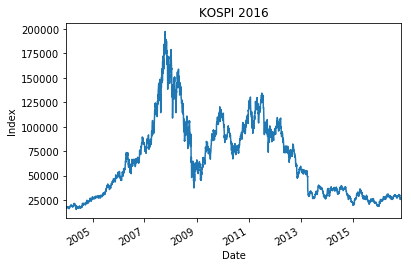

In [88]:
ax = df.Close.plot()

ax.set_title("KOSPI 2016")  
ax.set_ylabel("Index")  
ax.set_xlim("2004-01-01", "2016-11-15")  

In [8]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2004-01-02,816.26,821.87,813.63,821.26,307493600
2004-01-05,817.28,825.43,816.55,824.10,408258500
2004-01-06,831.26,831.26,819.53,823.43,484054800
2004-01-07,826.08,831.07,825.23,827.07,404563800
2004-01-08,831.10,839.28,824.15,824.15,428758500
2004-01-09,835.42,849.50,835.05,845.27,543285500
2004-01-12,843.96,853.50,840.11,850.79,443937900
2004-01-13,855.42,855.45,844.82,848.43,400184400
2004-01-14,847.27,855.29,844.55,849.62,453005400


In [33]:
origin = finance_data

In [55]:
finance_data[82]

,Open,High,Low,Close,Volume
Date,,,,,
2011-12-05,79700.0,85000.0,67900.0,68000.0,67422
2011-12-06,67200.0,71400.0,60300.0,65000.0,119564
2011-12-07,65700.0,67200.0,62500.0,62800.0,81692
2011-12-08,63200.0,72000.0,61200.0,62500.0,179658
2011-12-09,62400.0,62400.0,56800.0,57300.0,141212
2011-12-12,58400.0,59000.0,55100.0,56600.0,65178
2011-12-13,55500.0,57300.0,53900.0,53900.0,73707
2011-12-14,54200.0,54400.0,50500.0,52500.0,113811
2011-12-15,50500.0,59500.0,50500.0,57100.0,225103


In [45]:
table.shape

(2140,)

In [ ]:
df.join(df2)

In [ ]:
df.join(vkospi)

In [98]:
vkospi

,일자,콜평균내재변동성,풋평균내재변동성,대표변동성,역사적변동성(90일)
2004-12-30,2004/12/30,18.1,23.0,20.0,19.8
2004-12-29,2004/12/29,18.2,24.7,21.0,19.7
2004-12-28,2004/12/28,19.3,25.3,22.0,19.7
2004-12-27,2004/12/27,19.7,24.8,22.2,19.8
2004-12-24,2004/12/24,19.3,23.7,21.3,19.8
2004-12-23,2004/12/23,18.8,26.0,22.4,19.9
2004-12-22,2004/12/22,20.1,25.3,22.5,19.8
2004-12-21,2004/12/21,20.1,26.1,22.9,19.9
2004-12-20,2004/12/20,19.5,26.1,22.3,20.1
2004-12-17,2004/12/17,19.8,25.1,22.0,20.1


In [91]:
finance = finance_data[0]
for i in range(1,finance_data):
    finance = finance.merge(finance_data[i])

/Users/mac/anaconda/lib/python3.6/site-packages/pandas/tools/merge.py:1376: RuntimeWarning: divide by zero encountered in long_scalars
  stride //= shape[i]


In [95]:
result = pd.concat(finance_data,axis=1)

In [372]:
totalmetric = pd.concat([df.to_frame().unstack(level=1)[['Open','Volume']],vkospi],axis=1)

In [374]:
totalmetric

,"(Open, KRX:000020)","(Open, KRX:000050)","(Open, KRX:000070)","(Open, KRX:000100)","(Open, KRX:000120)","(Open, KRX:000140)","(Open, KRX:000150)","(Open, KRX:000210)","(Open, KRX:000230)","(Open, KRX:000240)",...,"(Volume, KRX:103140)","(Volume, KRX:103590)","(Volume, KRX:104700)","(Volume, KRX:105560)","(Volume, KRX:108670)",일자,콜평균내재변동성,풋평균내재변동성,대표변동성,역사적변동성(90일)
2004-01-02,1344.0,3027.0,19950.0,45450.0,19750.0,87400.0,12350.0,42500.0,1454.0,9020.0,...,NaN,NaN,NaN,1737715.0,NaN,2004/01/02,20.5,23.8,21.8,22.0
2004-01-05,1356.0,3106.0,19750.0,45586.0,19050.0,90200.0,12500.0,42600.0,1469.0,9160.0,...,NaN,NaN,NaN,1678481.0,NaN,2004/01/05,23.8,27.1,25.1,22.6
2004-01-06,1358.0,3061.0,19700.0,45112.0,19000.0,87000.0,12300.0,43150.0,1449.0,9100.0,...,NaN,NaN,NaN,1520854.0,NaN,2004/01/06,21.7,25.9,23.7,22.6
2004-01-07,1364.0,3106.0,19900.0,45382.0,18950.0,87900.0,11650.0,43650.0,1462.0,8850.0,...,NaN,NaN,NaN,1209399.0,NaN,2004/01/07,20.1,22.0,20.9,22.6
2004-01-08,1346.0,3106.0,20300.0,45721.0,20300.0,85500.0,11450.0,43350.0,1448.0,9350.0,...,NaN,NaN,NaN,1774765.0,NaN,2004/01/08,14.3,27.5,19.2,22.6
2004-01-09,1358.0,3216.0,20150.0,45179.0,20000.0,87300.0,11550.0,41550.0,1435.0,9790.0,...,NaN,NaN,NaN,1867371.0,NaN,2004/01/09,18.3,23.8,20.5,23.0
2004-01-12,1348.0,3182.0,20000.0,45044.0,20000.0,85600.0,11600.0,37000.0,1446.0,9660.0,...,NaN,NaN,NaN,2475003.0,NaN,2004/01/12,17.9,23.0,20.0,22.9
2004-01-13,1356.0,3182.0,19950.0,44163.0,20000.0,84100.0,11800.0,36950.0,1468.0,10150.0,...,NaN,NaN,NaN,1337987.0,NaN,2004/01/13,18.6,21.6,20.0,22.9
2004-01-14,1370.0,3144.0,20350.0,44976.0,19750.0,88200.0,11900.0,37000.0,1462.0,10100.0,...,NaN,NaN,NaN,1284941.0,NaN,2004/01/14,18.4,20.4,19.2,22.9
2004-01-15,1360.0,3144.0,20150.0,44773.0,20300.0,90400.0,12050.0,35500.0,1463.0,10100.0,...,NaN,NaN,NaN,2119418.0,NaN,2004/01/15,17.7,21.5,19.8,22.9


In [375]:
totalmetric = totalmetric.drop('일자',1)

In [376]:
totalmetric

,"(Open, KRX:000020)","(Open, KRX:000050)","(Open, KRX:000070)","(Open, KRX:000100)","(Open, KRX:000120)","(Open, KRX:000140)","(Open, KRX:000150)","(Open, KRX:000210)","(Open, KRX:000230)","(Open, KRX:000240)",...,"(Volume, KRX:100840)","(Volume, KRX:103140)","(Volume, KRX:103590)","(Volume, KRX:104700)","(Volume, KRX:105560)","(Volume, KRX:108670)",콜평균내재변동성,풋평균내재변동성,대표변동성,역사적변동성(90일)
2004-01-02,1344.0,3027.0,19950.0,45450.0,19750.0,87400.0,12350.0,42500.0,1454.0,9020.0,...,NaN,NaN,NaN,NaN,1737715.0,NaN,20.5,23.8,21.8,22.0
2004-01-05,1356.0,3106.0,19750.0,45586.0,19050.0,90200.0,12500.0,42600.0,1469.0,9160.0,...,NaN,NaN,NaN,NaN,1678481.0,NaN,23.8,27.1,25.1,22.6
2004-01-06,1358.0,3061.0,19700.0,45112.0,19000.0,87000.0,12300.0,43150.0,1449.0,9100.0,...,NaN,NaN,NaN,NaN,1520854.0,NaN,21.7,25.9,23.7,22.6
2004-01-07,1364.0,3106.0,19900.0,45382.0,18950.0,87900.0,11650.0,43650.0,1462.0,8850.0,...,NaN,NaN,NaN,NaN,1209399.0,NaN,20.1,22.0,20.9,22.6
2004-01-08,1346.0,3106.0,20300.0,45721.0,20300.0,85500.0,11450.0,43350.0,1448.0,9350.0,...,NaN,NaN,NaN,NaN,1774765.0,NaN,14.3,27.5,19.2,22.6
2004-01-09,1358.0,3216.0,20150.0,45179.0,20000.0,87300.0,11550.0,41550.0,1435.0,9790.0,...,NaN,NaN,NaN,NaN,1867371.0,NaN,18.3,23.8,20.5,23.0
2004-01-12,1348.0,3182.0,20000.0,45044.0,20000.0,85600.0,11600.0,37000.0,1446.0,9660.0,...,NaN,NaN,NaN,NaN,2475003.0,NaN,17.9,23.0,20.0,22.9
2004-01-13,1356.0,3182.0,19950.0,44163.0,20000.0,84100.0,11800.0,36950.0,1468.0,10150.0,...,NaN,NaN,NaN,NaN,1337987.0,NaN,18.6,21.6,20.0,22.9
2004-01-14,1370.0,3144.0,20350.0,44976.0,19750.0,88200.0,11900.0,37000.0,1462.0,10100.0,...,NaN,NaN,NaN,NaN,1284941.0,NaN,18.4,20.4,19.2,22.9
2004-01-15,1360.0,3144.0,20150.0,44773.0,20300.0,90400.0,12050.0,35500.0,1463.0,10100.0,...,NaN,NaN,NaN,NaN,2119418.0,NaN,17.7,21.5,19.8,22.9


In [147]:
data_sample = [None]*82
inx = 0
for i in finance_data[0:82] :
    temp = pd.concat([totalmetric, i.Open], axis=1)
    temp = temp.fillna(0)
    data_sample[inx] = temp.as_matrix().transpose()
    
    inx = inx+1

In [379]:
data_sample = [None]*220
inx = 0
for i in range(220) :
    temp = pd.concat([totalmetric, totalmetric[[i]]], axis=1)
    temp = temp.fillna(0)
    data_sample[inx] = temp.as_matrix().transpose()
    
    inx = inx+1

In [385]:
data_sample[40][-1][3000:]

array([ 942000.,  938000.,  947000.,  908000.,  865000.,  883000.,
        862000.,  864000.,  867000.,  861000.,  871000.,  894000.,
        888000.,  868000.,  876000.,  880000.,  893000.,  900000.,
        901000.,  902000.,  905000.,  878000.,  862000.,  941000.,
        919000.,  930000.,  928000.,  939000.,  931000.,  930000.,
        937000.,  913000.,  888000.,  881000.,  877000.,  870000.,
        885000.,  859000.,  857000.,  835000.,  823000.,  823000.,
        837000.,  831000.,  825000.,  833000.,  827000.,  802000.,
        783000.,  784000.,  807000.,  826000.,  821000.,  816000.,
        827000.,  825000.,  818000.,  819000.,  818000.,  820000.,
        821000.,  838000.,  838000.,  858000.,  843000.,  851000.,
        855000.,  842000.,  885000.,  917000.,  918000.,  920000.,
        928000.,  917000.,  934000.,  932000.,  933000.,  913000.,
        915000.,  909000.,  905000.,  884000.,  870000.,  878000.,
        907000.,  885000.,  852000.,  840000.,  831000.,  8430

In [386]:
data_sample[7].shape

(411, 3225)

In [146]:
np.nan_to_num(data_sample[7][0:419])

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ..., 
       [23.8, 27.1, 25.9, ..., 10.0, 10.3, 11.8],
       [21.8, 25.1, 23.7, ..., 9.5, 9.3, 9.5],
       [22.0, 22.6, 22.6, ..., 11.9, 11.9, 11.9]], dtype=object)

In [295]:
data_sample[80][-1][2100:]

array([ 24050.,  24650.,  24150., ...,  47700.,  47150.,  47400.])

In [388]:
x_train = np.zeros((3225,11890))
y_train = np.zeros(3225)

inx = 0
k = 80

for i in range(30,data_sample[0].shape[1]):
    x_temp = np.zeros((data_sample[0].shape[0]-1,29))
    for j in range(data_sample[0].shape[0]-1):
        x = data_sample[k][j]
        inx_f = i-30
        inx_b = i-1
        x= x[inx_f:inx_b]
        x_temp[inx] = x
        inx = inx+1
    inx = 0
    
    x_temp = x_temp.flatten()
    
    y = data_sample[k][-1][i]
    
    y_train[i-30] = y
    
    x_train[i-30] = x_temp
        
    

In [210]:
x_temp = np.zeros((data_sample[0].shape[0]-1,29))
x_temp[0] = x

In [213]:
x_temp

array([  0. ,   0. ,   0. , ...,  21. ,  20.9,  20.8])

In [185]:
range(30,data_sample[0].shape[1])[-1] -30

3194

In [165]:
data_sample[7][-1][1]

array([    0.,     0.,     0., ...,  9150.,  9150.,  9350.])

In [169]:
data_sample[7].shape

(420, 3225)

In [164]:
data_sample[0]

array([[  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       ..., 
       [ 21.8,  25.1,  23.7, ...,   9.5,   9.3,   9.5],
       [ 22. ,  22.6,  22.6, ...,  11.9,  11.9,  11.9],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]])

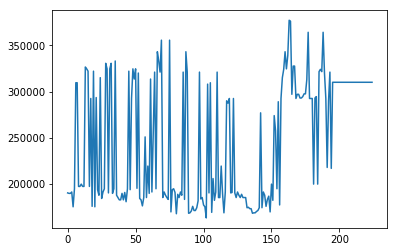

In [398]:
plt.plot(x_score)

In [391]:
y_train_test = y_train[2100:3000]

In [392]:
x_train_test = x_train[2100:3000]

In [271]:
y_train[2750:3180]

array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,  21150.,  21400.,  22500.,  24500.,  24900.,  24400.,
        25000.,  25000.,  24500.,  23400.,  22800.,  22400.,  23100.,
        24400.,  24750.,  24600.,  23600.,  24900.,  24650.,  23600.,
        23700.,  23450.,  23300.,  23350.,  23450.,  22850.,  22600.,
        22400.,  22400.,  23700.,  23050.,  23350.,  23950.,  26600.,
        26100.,  26250.,  24900.,  24650.,  24000.,  23250.,  23150.,
        23500.,  23100.,  23300.,  23050.,  22850.,  22800.,  22900.,
        22550.,  22450.,  22250.,  22150.,  21400.,  21400.,  21000.,
        20350.,  20050.,  19700.,  19600.,  19200.,  20150.,  20250.,
        20700.,  20800.,  21400.,  22100.,  23000.,  21400.,  20800.,
        20750.,  21100.,  20750.,  20000.,  20050.,  19850.,  20400.,
        20800.,  20350.,  20800.,  22100.,  22500.,  23100.,  22650.,
        22400.,  21650.,  22750.,  22900.,  22700.,  23650.,  22850.,
        23000.,  226

In [252]:
x_train[0:2000]

array([[  0. ,   0. ,   0. , ...,  21. ,  20.9,  20.8],
       [  0. ,   0. ,   0. , ...,  20.9,  20.8,  20.8],
       [  0. ,   0. ,   0. , ...,  20.8,  20.8,  20.9],
       ..., 
       [  0. ,   0. ,   0. , ...,  25. ,  25. ,  25. ],
       [  0. ,   0. ,   0. , ...,  25. ,  25. ,  25. ],
       [  0. ,   0. ,   0. , ...,  25. ,  25. ,  25. ]])

In [256]:
y_train.size

3195

In [153]:
np.nan_to_num(data_sample[7][0:419]).flatten().shape

(1351275,)

In [162]:
np.nan_to_num(data_sample[7][-1]).flatten().shape

(3225,)

In [161]:
print("hello")

hello


In [1]:
import pandas as pd
from pandas_datareader import data, wb  
from datetime import datetime



In [2]:
vkospi = [None]*14
for i in range(2004,2018):
    vkospi[i-2004]=pd.read_csv(str(i)+'_vkospi.csv')

vkospi = pd.concat(vkospi)

In [3]:
vkospi =vkospi.set_index(vkospi['일자'])

In [4]:
vkospi = vkospi.set_index(vkospi.index.to_datetime())

/Users/mac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  if __name__ == '__main__':


In [5]:
vkospi = vkospi.drop('일자',1)

In [6]:
import numpy as np

table = np.genfromtxt("table.txt",dtype=str)
table = table.transpose()

code_table = [None]*table.shape[0]
inx = 0

for i in range(table.shape[0]):
    Code = "KRX:"+table[i]
    code_table[inx] = Code
    inx =inx+1

In [7]:

# daily update
# 다음과 같이 기간을 설정해줄 수 있다.
df = data.DataReader(  
        code_table,        # name
        "google",           # data source
        datetime(2004, 1, 1),   # start
        datetime(2017, 5, 12),   # end
    )

/Users/mac/anaconda/lib/python3.6/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'KRX:003640', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/mac/anaconda/lib/python3.6/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'KRX:005270', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/mac/anaconda/lib/python3.6/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'KRX:005280', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/mac/anaconda/lib/python3.6/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'KRX:009720', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/mac/anaconda/lib/python3.6/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'KRX:053000', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/User

In [8]:
totalmetric = pd.concat([df.to_frame().unstack(level=1)[['Open','Volume']],vkospi],axis=1)

In [9]:
data_sample = [None]*220
inx = 0
for i in range(220) :
    temp = pd.concat([totalmetric, totalmetric[[i]]], axis=1)
    temp = temp.fillna(0)
    data_sample[inx] = temp.as_matrix().transpose()
    
    inx = inx+1

In [10]:
x_train = np.zeros((3313,11890))
y_train = np.zeros(3313)

inx = 0
k = 80

for i in range(30,data_sample[0].shape[1]):
    x_temp = np.zeros((data_sample[0].shape[0]-1,29))
    for j in range(data_sample[0].shape[0]-1):
        x = data_sample[k][j]
        inx_f = i-30
        inx_b = i-1
        x= x[inx_f:inx_b]
        x_temp[inx] = x
        inx = inx+1
    inx = 0
    
    x_temp = x_temp.flatten()
    
    y = data_sample[k][-1][i]
    
    y_train[i-30] = y
    
    x_train[i-30] = x_temp

In [11]:
y_train_test = y_train[2100:3000]
x_train_test = x_train[2100:3000]

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression(C=1., solver='lbfgs')

In [14]:
lr.fit(x_train_test,y_train_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
x_score = lr.predict(x_train[3000:])

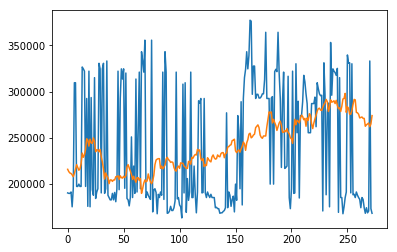

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline 

plt.plot(x_score[:-40])
plt.plot(y_train[3000:-40])

In [17]:
np.absolute(x_score[:-40]-y_train[3000:-40]).mean()

54891.941391941393

In [18]:
lr.score(x_train[3000:-40],y_train[3000:-40])

0.0

In [19]:
lr.predict(x_train[-1])

/Users/mac/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 310000.])

In [20]:
x =lr.predict(x_train[-5:-2])

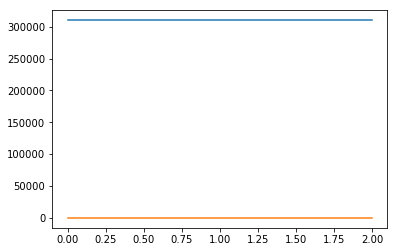

In [21]:
plt.plot(x)
plt.plot(y_train[-4:-1])

In [22]:
from math import ceil
import numpy as np
from scipy import linalg


def lowess(x, y, f=2. / 3., iter=3):
    """lowess(x, y, f=2./3., iter=3) -> yest
    Lowess smoother: Robust locally weighted regression.
    The lowess function fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The smoothing span is given by f. A larger value for f will result in a
    smoother curve. The number of robustifying iterations is given by iter. The
    function will run faster with a smaller number of iterations.
    """
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest

In [23]:
f = 0.1

In [24]:
yest = lowess(np.linspace(num=x_score[:-40].size,start = 0, stop = x_score[:-40].size+-1), 
              x_score[:-40], f=f, iter=3)

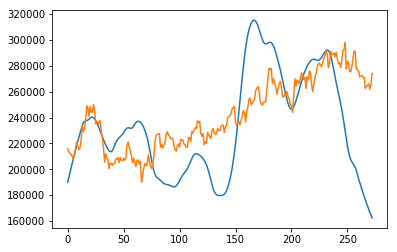

In [25]:
plt.plot(yest)
plt.plot(y_train[3000:-40])

In [26]:
yest[-1]-yest[-2]

-2186.6196822166676

5
-2320.51282051
6
-2320.51282051
7
-2320.51282051
8
-2320.51282051
9
-2320.51282051
10
-2320.51282051
11
-2320.51282051
12
-2320.51282051
13
-2320.51282051
14
-2320.51282051
15
-2320.51282051
16
-2320.51282051
17
-2320.51282051
18
-2320.51282051
19
-2320.51282051
20
-2320.51282051
21
-2320.51282051
22
-2320.51282051
23
-2320.51282051
24
-2320.51282051


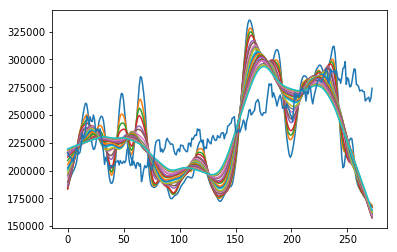

In [76]:
for i in range(5,25):
    f = i/100
    yest = lowess(np.linspace(num=x_score[:-40].size,start = 0, stop = x_score[:-40].size+-1), x_score[:-40], f=f, iter=3)
    m = ((x_score[:-40]-y_train[3000:-40])).mean()
    print(i)
    print(m)
    plt.plot(yest)
    
plt.plot(y_train[3000:-40])

최근 한달간의 정확도 & 현재의 증가율을 텍스트로 저장

현재의 증가율 연산 방법 = 하루전 예측 데이터 - output / 하루 전 예측 데이터  = 이미 Locally weighted regression 을 사용했기 때문에 괜찮아..


In [27]:
x_train = np.zeros((3313,11890))
y_train = np.zeros(3313)

cluster_x = np.zeros(220)
cluster_y = np.zeros(220)

inx = 0

for k in range(220):
    for i in range(30,data_sample[0].shape[1]):
        x_temp = np.zeros((data_sample[0].shape[0]-1,29))
        for j in range(data_sample[0].shape[0]-1):
            x = data_sample[k][j]
            inx_f = i-30
            inx_b = i-1
            x= x[inx_f:inx_b]
            x_temp[inx] = x
            inx = inx+1
        inx = 0

        x_temp = x_temp.flatten()

        y = data_sample[k][-1][i]

        y_train[i-30] = y

        x_train[i-30] = x_temp
    y_train_test = y_train[2100:3000]
    x_train_test = x_train[2100:3000]
    lr.fit(x_train_test,y_train_test)
    x_score = lr.predict(x_train[3000:])
    try :
        
        yest = lowess(np.linspace(num=x_score[:-40].size,start = 0, stop = x_score[:-40].size+-1), 
              x_score[:-40], f=f, iter=3)
    except :
        yest = x_score[:-40]
    
    m = np.absolute((x_score[:-40]-y_train[3000:-40])/y_train[3000:-40]).mean()
    d = (yest[-1]-yest[-2])
    cluster_x[k] = m
    cluster_y[k] = d

LinAlgError: singular matrix

In [38]:
x_score

array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
        59900.,      0.,      0.,      0.,  59900.,  56000.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
        59900.,  59900.,  59900.,  45450.,  46300.,  44500.,      0.,
            0.,      0.,  59900.,      0.,      0.,      0.,      0.,
            0.,  59900.,  60500.,      0.,      0.,  61100.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,     

In [29]:
cluster_x

array([   2171.28205128,    5719.28205128,   36165.93406593,
         49031.73626374,   35613.55311355,    1782.41758242,
         16142.49084249,    9747.61904762,    7931.02564103,
          4000.18315018,   11559.89010989,   15910.62271062,
         30610.62271062,    8078.38827839,  199058.60805861,
          2533.0952381 ,   11747.06959707,   29882.78388278,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,

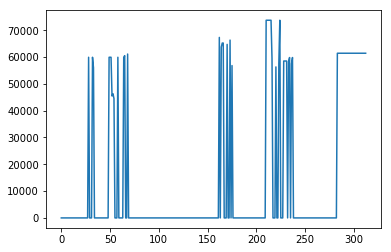

In [36]:
plt.plot(x_score)

In [30]:
cluster_y

array([   35.19668947,  -163.33969386,  3404.40007203,  2364.42085684,
         545.52238204,   -43.06304103,   135.14434333,   279.82220657,
          11.31308752,    10.90216384,    79.98948575,   508.33842907,
        -755.2688826 ,    -5.1678772 ,  -288.85932118,    12.64685504,
       -1362.25941271,  1473.38532004,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
      

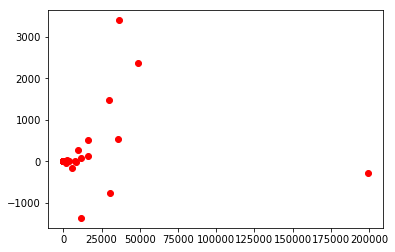

In [34]:
plt.plot(cluster_x,cluster_y, 'ro')

In [ ]:
lr.fit(x_train_test,y_train_test)

In [ ]:
x_score = lr.predict(x_train[3000:])

In [ ]:
yest = lowess(np.linspace(num=x_score[:-40].size,start = 0, stop = x_score[:-40].size+-1), 
              x_score[:-40], f=f, iter=3)

In [ ]:
np.absolute(x_score[:-40]-y_train[3000:-40]).mean()